In [82]:
headers = ["APS", "ABPS", "SUBARP","MISS_MAC", "TIME", "CLASS"]
    

In [83]:
import csv#load features-file.csv file and convert it to a list
with open('features-file.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    reader = list(reader)
    

In [84]:
reader

[['0.0', '1793.3333333333333', '0', '0', '01:53', '0'],
 ['0.0', '0.0', '0', '0', '01:57', '0'],
 ['1.6666666666666667', '95.0', '5', '0', '02:02', '0'],
 ['45.0', '203.0', '135', '0', '02:06', '0'],
 ['74.0', '41.666666666666664', '130', '0', '02:10', '0'],
 ['87.33333333333333', '15.0', '82', '0', '02:13', '0'],
 ['74.66666666666667', '6.666666666666667', '18', '0', '02:17', '0'],
 ['40.333333333333336', '0.0', '9', '0', '02:21', '0'],
 ['12.0', '0.0', '4', '0', '02:24', '0'],
 ['10.0', '0.0', '0', '0', '02:28', '0'],
 ['16.666666666666668', '0.0', '0', '0', '02:31', '0'],
 ['30.666666666666668', '0.0', '0', '0', '02:35', '0'],
 ['42.666666666666664', '0.0', '0', '0', '02:39', '0'],
 ['48.666666666666664', '0.0', '0', '0', '02:42', '0'],
 ['45.333333333333336', '0.0', '0', '0', '02:46', '0'],
 ['40.666666666666664', '0.0', '0', '0', '02:49', '0'],
 ['41.333333333333336', '0.0', '0', '0', '02:53', '0'],
 ['42.666666666666664', '0.0', '0', '0', '02:57', '0'],
 ['46.666666666666664', '0

In [85]:
# save them with header to become dataframe
import pandas as pd
df = pd.DataFrame(reader, columns=headers)
df


,APS,ABPS,SUBARP,MISS_MAC,TIME,CLASS
0,0.0,1793.3333333333333,0,0,01:53,0
1,0.0,0.0,0,0,01:57,0
2,1.6666666666666667,95.0,5,0,02:02,0
3,45.0,203.0,135,0,02:06,0
4,74.0,41.666666666666664,130,0,02:10,0
...,...,...,...,...,...,...
394,34.333333333333336,0.0,1,1,43:12,1
395,43.666666666666664,0.0,1,1,43:16,1
396,45.0,0.0,1,1,43:20,1
397,39.0,0.0,1,1,43:24,1


In [86]:
#drop CLASS column and TIME column
X = df.drop(['CLASS', 'TIME'], axis=1)
X

,APS,ABPS,SUBARP,MISS_MAC
0,0.0,1793.3333333333333,0,0
1,0.0,0.0,0,0
2,1.6666666666666667,95.0,5,0
3,45.0,203.0,135,0
4,74.0,41.666666666666664,130,0
...,...,...,...,...
394,34.333333333333336,0.0,1,1
395,43.666666666666664,0.0,1,1
396,45.0,0.0,1,1
397,39.0,0.0,1,1


In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['CLASS'], test_size=0.2, random_state=42)

In [88]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(319, 4) (80, 4) (319,) (80,)


In [89]:
from sklearn.neural_network import MLPClassifier


In [90]:
model_neural = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500) 
#explain hidden_layer_sizes: 3 layers with 13 neurons each layer

In [91]:
#train the model
MitM_nn = model_neural.fit(X_train, y_train)


/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [92]:
#print Score
print("Score: ", MitM_nn.score(X_test, y_test))

Score:  0.9375


In [93]:
predictions = MitM_nn.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predictions': predictions})
results.head()

,Actual,Predictions
198,0,0
349,1,1
33,0,0
208,0,0
93,0,0


[[46  1]
 [ 4 29]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        47
           1       0.97      0.88      0.92        33

    accuracy                           0.94        80
   macro avg       0.94      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



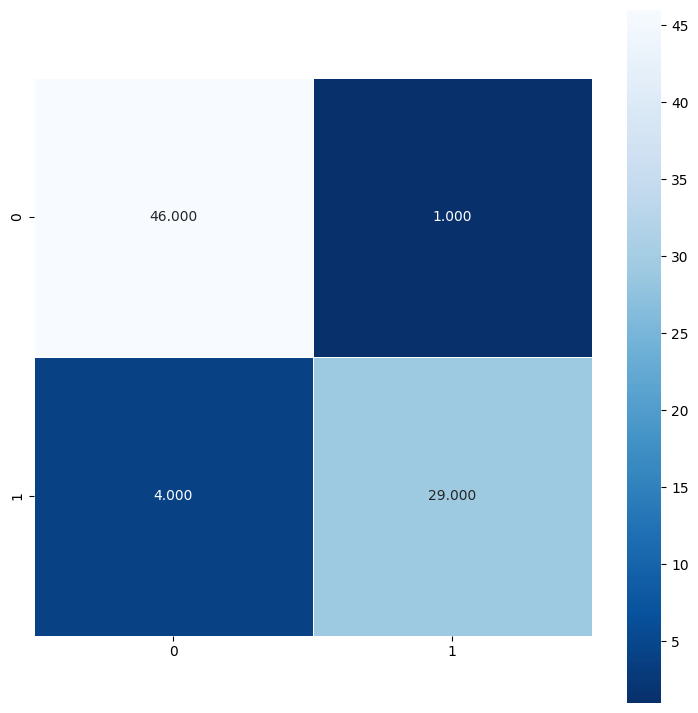

In [94]:
#print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))



In [95]:
#extract the model to pickle file
import pickle
pickle.dump(MitM_nn, open('MitM_nn', 'wb'))